# XOR problem

In [1]:
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim

## Create XOR data

In [2]:
if torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'

In [3]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

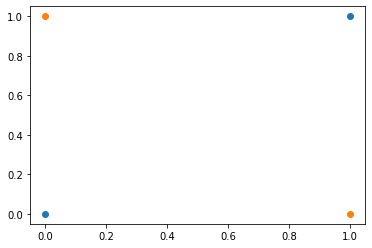

In [4]:
for label in [0, 1]:
    sub_d = X[(y==label)[:,0], :]
    plt.plot(sub_d[:, 0], sub_d[:, 1], 'o')

## Create logistic regression model and training

In [5]:
class linear_model(nn.Module):
    def __init__(self):
        super().__init__()
#         self.linear = nn.Linear(2, 1, bias=True)
#         self.sigmod = torch.nn.Sigmod()
        self.layer = nn.Sequential(
                                nn.Linear(2, 1, bias=True), 
                                nn.Sigmoid())
    
    def forward(self, x):
#         out = self.linear(x)
#         out = self.sigmod(input_layer)
        out = self.layer(x)
        
        return out

In [6]:
model = linear_model()

In [7]:
epochs = 10000
learning_rate = 1

In [8]:
criterion = nn.BCELoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

for step in range(epochs+1):
    optimizer.zero_grad()
    hypothesis = model(X)
    
    cost = criterion(hypothesis, y)
    cost.backward()
    optimizer.step()
    
    if step % 1000 == 0:
        print(step, cost.item())
    

0 0.7105168104171753
1000 0.6931471824645996
2000 0.6931471824645996
3000 0.6931471824645996
4000 0.6931471824645996
5000 0.6931471824645996
6000 0.6931471824645996
7000 0.6931471824645996
8000 0.6931471824645996
9000 0.6931471824645996
10000 0.6931471824645996


## 결과 확인

In [9]:
model(X)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward>)

In [10]:
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == y).float().mean()
    print('\nHypothesis: ', hypothesis.detach().cpu().numpy(), '\nCorrect: ', predicted.detach().cpu().numpy(), '\nAccuracy: ', accuracy.item())


Hypothesis:  [[0.5]
 [0.5]
 [0.5]
 [0.5]] 
Correct:  [[0.]
 [0.]
 [0.]
 [0.]] 
Accuracy:  0.5


## Create multilayer perceptron and training

In [11]:
class multi_layer_model(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer = nn.Sequential(
                                nn.Linear(2, 2, bias=True), 
                                nn.Sigmoid(),
                                nn.Linear(2, 1, bias=True), 
                                nn.Sigmoid())
    
    def forward(self, x):
        out = self.layer(x)
        
        return out

In [12]:
model = multi_layer_model()

In [13]:
criterion = nn.BCELoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

for step in range(epochs+1):
    optimizer.zero_grad()
    hypothesis = model(X)
    
    cost = criterion(hypothesis, y)
    cost.backward()
    optimizer.step()
    
    if step % 1000 == 0:
        print(step, cost.item())
    

0 0.7054757475852966
1000 0.04345174878835678
2000 0.008054021745920181
3000 0.0043595656752586365
4000 0.0029778967145830393
5000 0.002257916145026684
6000 0.0018169365357607603
7000 0.0015194187872111797
8000 0.0013052027206867933
9000 0.0011436949716880918
10000 0.0010176404612138867


In [14]:
model(X)

tensor([[1.3092e-03],
        [9.9909e-01],
        [9.9909e-01],
        [9.3569e-04]], grad_fn=<SigmoidBackward>)

In [15]:
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == y).float().mean()
    print('\nHypothesis: ', hypothesis.detach().cpu().numpy(), '\nCorrect: ', predicted.detach().cpu().numpy(), '\nAccuracy: ', accuracy.item())


Hypothesis:  [[1.3091861e-03]
 [9.9908864e-01]
 [9.9908829e-01]
 [9.3568536e-04]] 
Correct:  [[0.]
 [1.]
 [1.]
 [0.]] 
Accuracy:  1.0
